In [73]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import time

In [2]:
# pandas settings

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Importing Dataset

In [3]:
# reading data train

data_train = pd.read_csv("train.csv")

In [4]:
data_train.head()

,age,education,default,balance,housing,loan,day,month,duration,campaign,previous,contact_cellular,contact_telephone,marital_divorced,marital_married,marital_single,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,y
0,0.695517,-0.232452,0,-0.713083,1,0,0.695517,-0.401396,-0.260866,-0.900753,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,-0.636765,-0.232452,0,-0.761484,1,1,-0.636765,-0.401396,-1.015248,-0.900753,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1.058867,-0.232452,0,1.934648,1,0,1.058867,-0.401396,-0.854313,-0.900753,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
3,-0.636765,-0.232452,0,-0.763277,0,0,-0.636765,-0.401396,0.211880,-0.900753,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
4,-0.394532,1.353897,0,-0.350969,1,0,-0.394532,-0.401396,-0.381567,-0.900753,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [5]:
# reading data test

data_test = pd.read_csv("test.csv")

In [6]:
data_test.head()

,age,education,default,balance,housing,loan,day,month,duration,campaign,previous,y,contact_cellular,contact_telephone,marital_divorced,marital_married,marital_single,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,-1.056270,-1.758874,0,0.121072,0,0,-1.056270,1.611873,-0.711861,-0.576829,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,-0.772583,-0.227607,0,1.118644,1,1,-0.772583,-0.490631,-0.169194,-0.576829,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,-0.583458,1.303660,0,-0.024144,1,0,-0.583458,-0.911131,-0.303898,-0.576829,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
3,-1.056270,1.303660,0,0.017726,1,1,-1.056270,-0.070130,-0.250017,0.387967,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
4,1.686036,-0.227607,0,-0.472753,1,0,1.686036,-0.490631,-0.146102,-0.576829,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0


## Modelling

### Split Data Train & Test

#### Kaggle Default

In [7]:
# splitting by kaggle task default

jumlah_train = data_train.shape[0]
jumlah_test  = data_test.shape[0]

total      = jumlah_train + jumlah_test
perc_train = round(jumlah_train/total*100,2)
perc_test  = round(jumlah_test/total*100,2)

print("Jumlah Train Dataset adalah sejumlah : " +str(jumlah_train)+" ("+str(perc_train)+"%)")
print("Jumlah Test Dataset adalah sejumlah  : " +str(jumlah_test)+"  ("+str(perc_test)+"%)")

Jumlah Train Dataset adalah sejumlah : 45276 (90.92%)
Jumlah Test Dataset adalah sejumlah  : 4521  (9.08%)


In [8]:
# categorising feature & label

feature = ['age','education','default','balance','housing','loan','day','month','duration','campaign','previous',
          'contact_cellular','contact_telephone','marital_divorced','marital_married','marital_single',
          'job_admin.','job_blue-collar','job_entrepreneur','job_housemaid','job_management','job_retired','job_self-employed',
          'job_services','job_student','job_technician','job_unemployed']

label   = ['y']

In [9]:
# train variable

X_train = data_train[feature]
y_train = data_train['y']

In [10]:
# test variabel

X_test = data_test[feature]
y_test = data_test['y']

### Modeling Preparation

#### Evaluation Method

In [11]:
def eval_classification(model):
    y_pred             = model.predict(X_test)
    y_pred_train       = model.predict(X_train)
    y_pred_proba       = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)

    print("Accuracy  (Test Set)    : %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set)    : %.2f" % precision_score(y_test, y_pred))
    print("Recall    (Test Set)    : %.2f" % recall_score(y_test, y_pred))
    
    print("\nF1-Score  (Test Set)    : %.2f" % f1_score(y_test, y_pred))

    print("\nroc_auc   (test-proba)  : %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc   (train-proba) : %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

In [12]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

In [13]:
def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [90]:
def draw_learning_curve_tree(param_values):
    train_scores = []
    test_scores = []

    for n in param_values:
        model = DecisionTreeClassifier(min_samples_split=10,criterion='gini',splitter='best',max_depth=n)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(n) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('n_estimators')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter n-neighbor - KNN')
    plt.legend()
    plt.show()

In [94]:
def draw_learning_curve_forest(param_values):
    train_scores = []
    test_scores = []

    for n in param_values:
        model = RandomForestClassifier(criterion='gini',max_depth=None, n_estimators=n)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(n) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('max_depth')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter n-neighbor - KNN')
    plt.legend()
    plt.show()

### Decision Tree

#### Without Hyperparameter Tuning

In [14]:
start_time = time.time()

tree = DecisionTreeClassifier(max_depth=None,
                                min_samples_split=2,
                                criterion='gini',
                                splitter='best')
tree.fit(X_train, y_train)

print("\nExecution time: " + str((time.time() - start_time)) + ' ms')


Execution time: 0.29638195037841797 ms


In [15]:
eval_classification(tree)

Accuracy  (Test Set)    : 0.39
Precision (Test Set)    : 0.14
Recall    (Test Set)    : 0.85

F1-Score  (Test Set)    : 0.24

roc_auc   (test-proba)  : 0.59
roc_auc   (train-proba) : 1.00


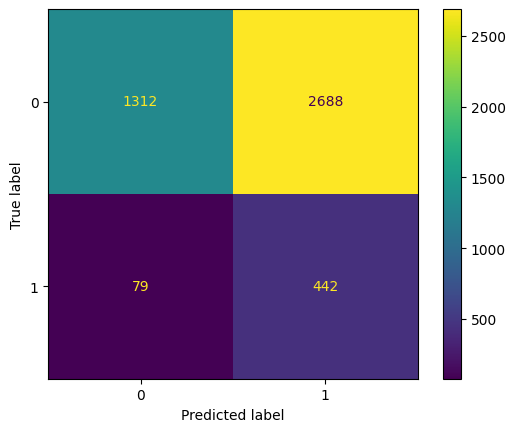

In [16]:
predictions = tree.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree.classes_)
disp.plot()
plt.show()

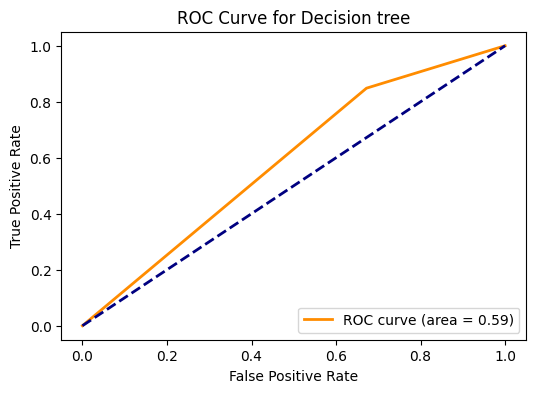

In [17]:
probs = tree.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision tree')
plt.legend(loc="lower right")
plt.show()

#### With Hyperparameter Tuning

In [28]:
max_depth = [None, 5, 10, 20]
min_samples_split= [2, 5, 10]
param_grid = dict(max_depth=max_depth, min_samples_split=min_samples_split)

In [29]:
start_time = time.time()

tree = DecisionTreeClassifier(criterion='gini',
                                splitter='best')
tree_grid = GridSearchCV(tree, param_grid, scoring='roc_auc', cv=5)
tree_grid.fit(X_train, y_train)

print("\nExecution time: " + str((time.time() - start_time)) + ' ms')


Execution time: 9.024113178253174 ms


In [30]:
eval_classification(tree_grid)
print("\nBest: %f using %s" % (tree_grid.best_score_, tree_grid.best_params_))

Accuracy  (Test Set)    : 0.39
Precision (Test Set)    : 0.14
Recall    (Test Set)    : 0.83

F1-Score  (Test Set)    : 0.24

roc_auc   (test-proba)  : 0.59
roc_auc   (train-proba) : 1.00

Best: 0.875426 using {'max_depth': None, 'min_samples_split': 10}


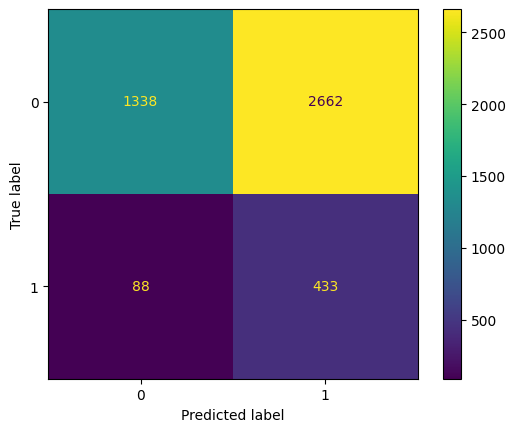

In [31]:
predictions = tree_grid.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=tree_grid.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree_grid.classes_)
disp.plot()
plt.show()

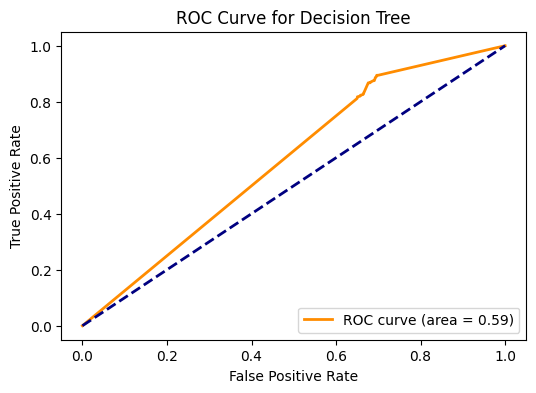

In [32]:
knn_probs = tree_grid.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, knn_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend(loc="lower right")
plt.show()

##### Phase 1 Learning Curve

param value: 10; train: 0.9668259010801619; test: 0.5708087811900192
param value: 20; train: 0.9969331126445046; test: 0.5644654510556621
param value: 30; train: 0.9991787234913746; test: 0.5926521113243762
param value: 40; train: 0.9991889014685252; test: 0.5937272072936661
param value: 50; train: 0.9992010024511363; test: 0.5931677063339732
param value: 60; train: 0.999194672436206; test: 0.59378886756238
param value: 70; train: 0.9991930372473923; test: 0.59390283109405
param value: 80; train: 0.9991995067802226; test: 0.5920954894433782
param value: 90; train: 0.9991951924574696; test: 0.5931446737044146
param value: 100; train: 0.9992082203072483; test: 0.5953994721689059
param value: 110; train: 0.9992001068047575; test: 0.5923968330134357
param value: 120; train: 0.9991801157434254; test: 0.5923414107485605
param value: 130; train: 0.9991970871690902; test: 0.5936619481765835
param value: 140; train: 0.9992112623828575; test: 0.5912727927063339
param value: 150; train: 0.9991967

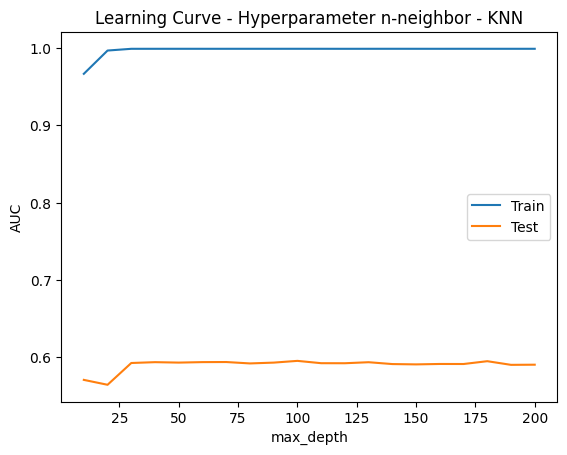

In [38]:
param_values = [int(x) for x in np.linspace(10, 200, 20)]
draw_learning_curve_tree(param_values)

##### Phase 2 Learning Curve

param value: 1; train: 0.7194761021291634; test: 0.5812425623800385
param value: 16; train: 0.9927564745457182; test: 0.553271113243762
param value: 32; train: 0.9992027830117479; test: 0.5913946737044146
param value: 48; train: 0.9991823246142333; test: 0.5944736084452975
param value: 63; train: 0.999174714546962; test: 0.5905359884836852
param value: 79; train: 0.9991948412235955; test: 0.5902912667946256
param value: 95; train: 0.9991840895644505; test: 0.5905518234165067
param value: 111; train: 0.9991977769533928; test: 0.5932000959692898
param value: 126; train: 0.9991940158239914; test: 0.5907915067178504
param value: 142; train: 0.9991864545392025; test: 0.5951094049904031
param value: 158; train: 0.999201181970672; test: 0.5922567178502879
param value: 174; train: 0.9992051626212447; test: 0.5939971209213052
param value: 189; train: 0.9991983906370229; test: 0.5954258637236085
param value: 205; train: 0.999199073591778; test: 0.5913313339731286
param value: 221; train: 0.99919

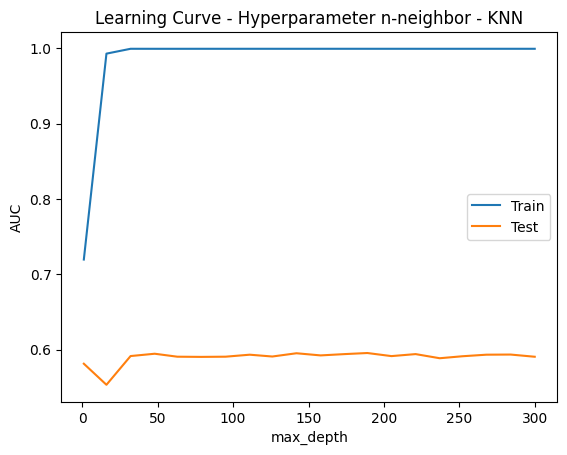

In [42]:
param_values = [int(x) for x in np.linspace(1, 300, 20)]
draw_learning_curve_tree(param_values)

#### Best Result Implementation From Learning Curve

In [43]:
start_time = time.time()

tree_best = DecisionTreeClassifier(max_depth=1,
                              criterion='gini',
                              splitter='best')
tree_best.fit(X_train, y_train)

print("\nExecution time: " + str((time.time() - start_time)) + ' ms')


Execution time: 0.04496908187866211 ms


In [44]:
eval_classification(tree_best)

Accuracy  (Test Set)    : 0.58
Precision (Test Set)    : 0.15
Recall    (Test Set)    : 0.58

F1-Score  (Test Set)    : 0.24

roc_auc   (test-proba)  : 0.58
roc_auc   (train-proba) : 0.72


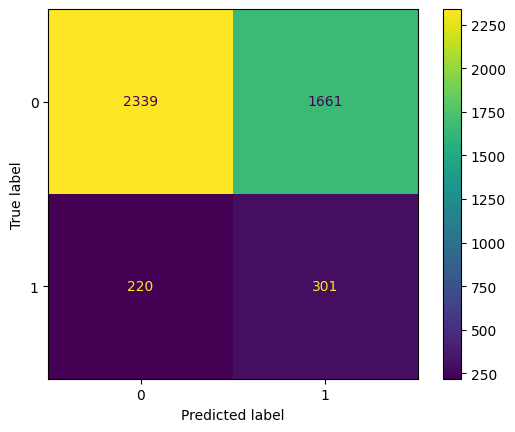

In [45]:
predictions = tree_best.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=tree_best.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree_best.classes_)
disp.plot()
plt.show()

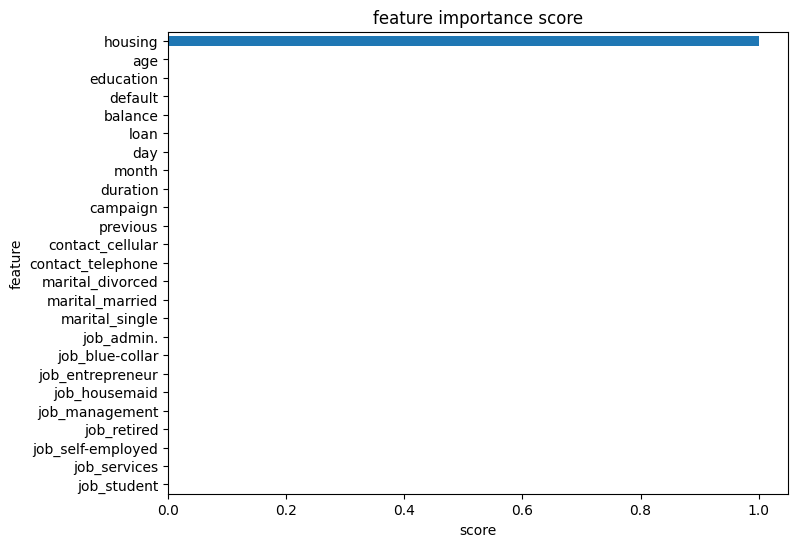

In [51]:
feat_importances = pd.Series(tree_best.feature_importances_, index=X_train.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(8, 6))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')
plt.show()

### RandomForest

In [20]:
start_time = time.time()

forest = RandomForestClassifier(n_estimators=100,
                                max_depth=None,
                                min_samples_split=2,
                                criterion='gini')
forest.fit(X_train, y_train)

print("\nExecution time: " + str((time.time() - start_time)) + ' ms')


Execution time: 3.8282790184020996 ms


In [21]:
eval_classification(forest)

Accuracy  (Test Set)    : 0.46
Precision (Test Set)    : 0.15
Recall    (Test Set)    : 0.82

F1-Score  (Test Set)    : 0.26

roc_auc   (test-proba)  : 0.71
roc_auc   (train-proba) : 1.00


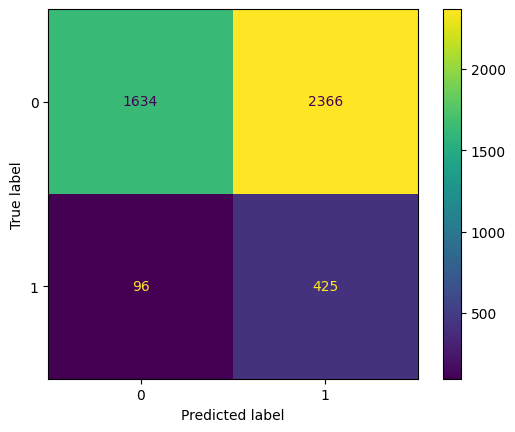

In [22]:
predictions = forest.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=forest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=forest.classes_)
disp.plot()
plt.show()

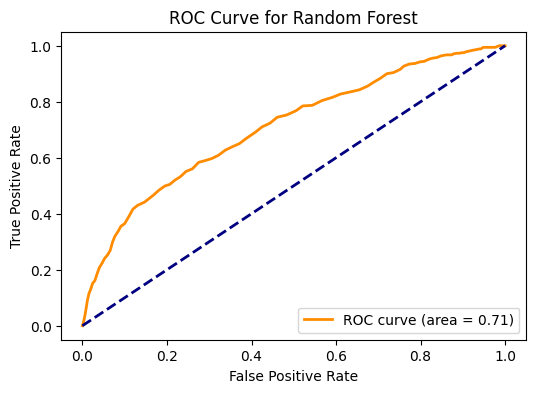

In [23]:
probs = forest.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()

#### With Hyperparameter Tuning

In [78]:
n_estimators = [50, 100, 200]
max_depth = [None, 5, 10]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)

In [79]:
start_time = time.time()

random_forest = RandomForestClassifier()
forest_grid = GridSearchCV(random_forest, param_grid, cv=5)
forest_grid.fit(X_train, y_train)

print("Execution time: " + str((time.time() - start_time)) + ' ms')

Execution time: 115.87381100654602 ms


In [80]:
eval_classification(forest_grid)
print("\nBest: %f using %s" % (forest_grid.best_score_, forest_grid.best_params_))

Accuracy  (Test Set)    : 0.50
Precision (Test Set)    : 0.16
Recall    (Test Set)    : 0.77

F1-Score  (Test Set)    : 0.26

roc_auc   (test-proba)  : 0.70
roc_auc   (train-proba) : 1.00

Best: 0.880178 using {'max_depth': None, 'n_estimators': 200}


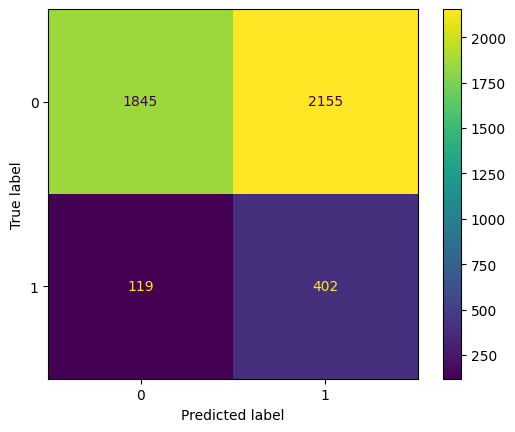

In [81]:
predictions = forest_grid.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=forest_grid.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=forest_grid.classes_)
disp.plot()
plt.show()

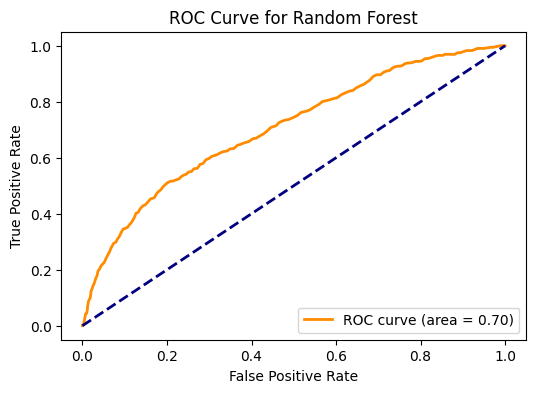

In [82]:
probs = forest_grid.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()

##### Phase 1 Learning Curve

param value: 200; train: 1.0000000000000002; test: 0.7060583013435701
param value: 210; train: 1.0; test: 0.7081674664107487
param value: 221; train: 1.0; test: 0.7129354606525912
param value: 231; train: 1.0; test: 0.699170585412668
param value: 242; train: 1.0; test: 0.7102526391554702
param value: 252; train: 1.0; test: 0.70116386756238
param value: 263; train: 1.0; test: 0.7100825335892514
param value: 273; train: 1.0; test: 0.7147847888675624
param value: 284; train: 1.0; test: 0.702383877159309
param value: 294; train: 1.0; test: 0.7046581094049904
param value: 305; train: 1.0; test: 0.7048757197696737
param value: 315; train: 1.0; test: 0.6963498080614203
param value: 326; train: 1.0000000000000002; test: 0.7041636276391555
param value: 336; train: 1.0; test: 0.7111559500959692
param value: 347; train: 1.0; test: 0.70103886756238
param value: 357; train: 1.0; test: 0.7039599328214972
param value: 368; train: 1.0; test: 0.7095496641074855
param value: 378; train: 1.0; test: 0.705

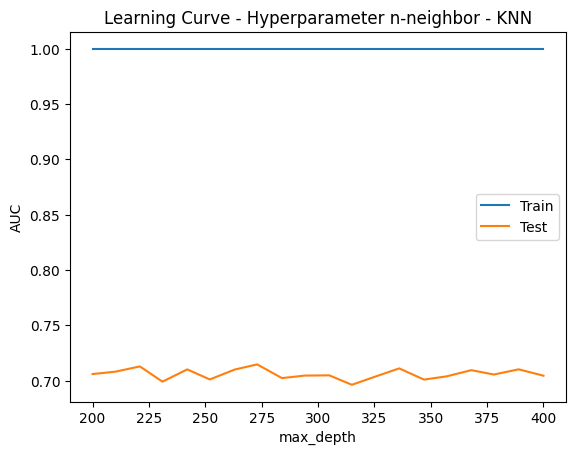

In [95]:
param_values = [int(x) for x in np.linspace(200, 400, 20)]
draw_learning_curve_forest(param_values)

#### Best Result Implementation From Learning Curve

In [96]:
start_time = time.time()

forest_best = RandomForestClassifier(max_depth=None,
                              criterion='gini',
                              n_estimators=273,
                              min_samples_split=2)
forest_best.fit(X_train, y_train)

print("\nExecution time: " + str((time.time() - start_time)) + ' ms')


Execution time: 10.388091087341309 ms


In [97]:
eval_classification(forest_best)

Accuracy  (Test Set)    : 0.50
Precision (Test Set)    : 0.16
Recall    (Test Set)    : 0.77

F1-Score  (Test Set)    : 0.26

roc_auc   (test-proba)  : 0.71
roc_auc   (train-proba) : 1.00


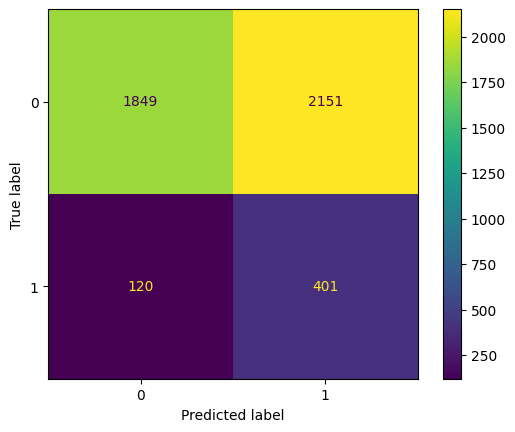

In [98]:
predictions = forest_best.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=forest_best.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=forest_best.classes_)
disp.plot()
plt.show()

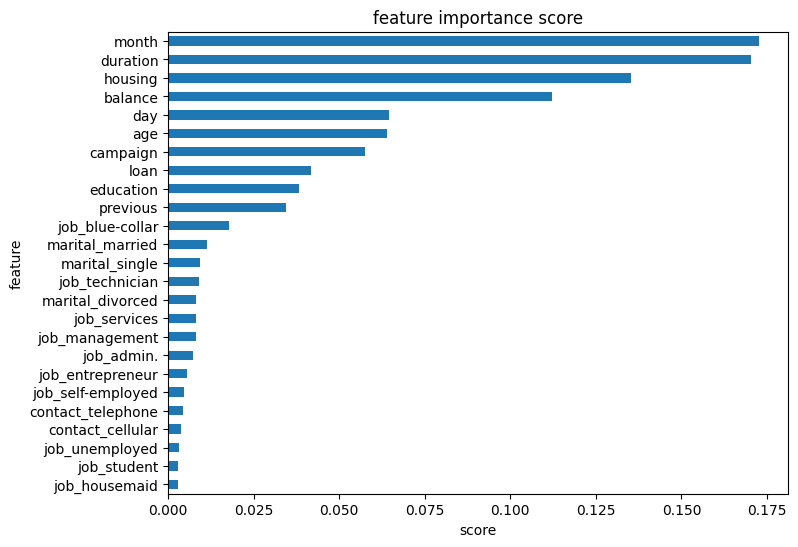

In [99]:
feat_importances = pd.Series(forest_best.feature_importances_, index=X_train.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(8, 6))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')
plt.show()

### Business Insights